In [1]:
from matplotlib import pyplot as plt
from matplotlib import collections as mc
import math
%matplotlib inline

#Koch Snowflake Introduction
A Koch Snowflake is a fractal that has been known for over 100 years 
(see the [Wikipedia article](https://en.wikipedia.org/wiki/Koch_snowflake Wikipedia article)
for history).

The shaped is formed by starting from a triangle. For each line segment, remove the middle third
and replace it by two equal pieces that form a triangle.

To program this in python, we simply need a function that turns a line segment into four shorter
segments. We'll use a pair of tuples to represent a line segment: $((x_a,y_a), (x_b,y_b))$.
The current shape will be a list of segments.

All we need is a function that takes one line segment and expands it into four smaller segments.
We'll call the original segment ae, and create new points b, c, d, so that the four segemnts
are ab, bc, cd, and de. First, let's work this out by hand, then we'll make the function.

In [2]:
a = (0.0, 0.0)
e = (1.0, 0.0)
ae = (a,e)

It's helpful to be able to make a plot of a list of segments.

In [3]:
def plot_segments(segments):
    fig, ax = plt.subplots()
    lines = mc.LineCollection(segments)
    ax.add_collection(lines)
    ax.margins(0.2)
    ax.set_aspect('equal')
    ax.autoscale()
    return ax

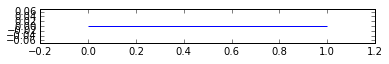

In [4]:
plot_segments([ae]);

Next we figure out formulas for points b, c, and d.
Points b and d are easy, because they are 1/3 and 2/3 of the way along the segment ae.

In [5]:
b = ((2*a[0]+e[0]/3, (2*a[1]+e[1])/3))
d = ((a[0]+2*e[0]/3, (a[1]+2*e[1])/3))

Point c is trickier, because it doesn't lie directly on the line segment.
It is the vertex of an equilateral triangle with side length |ae|/3.
To get to point c, find the midpoint of ae, then go out perpendicularly a distance $\sqrt{3}/6$.
To move perpendicularly, we use that trick that the point (-y, x) is rotated 90° CCW from (x, y).

In [6]:
k = math.sqrt(3)/6
c = ((a[0]+e[0])/2 - k * (e[1]-a[1]), (a[1]+e[1])/2 + k *(e[0]-a[0]))

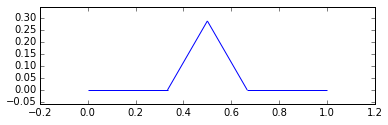

In [7]:
plt.gcf().clear()
plot_segments([(a,b), (b,c), (c,d), (d,e)]);


Now we make this into a function.

In [8]:
def f(seg):
    a = seg[0]
    e = seg[1]
    b = ((2*a[0]+e[0])/3, (2*a[1]+e[1])/3)
    d = ((a[0]+2*e[0])/3, (a[1]+2*e[1])/3)
    k = math.sqrt(3)/6
    c = ((a[0]+e[0])/2 - k * (e[1]-a[1]), (a[1]+e[1])/2 + k *(e[0]-a[0]))
    return [(a,b), (b,c), (c,d), (d,e)]

We'll test this function on some different line segments.

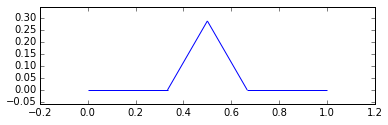

In [9]:
plot_segments(f(((0,0),(1,0))));

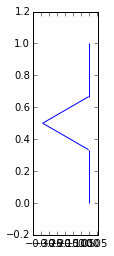

In [10]:
plot_segments(f(((0,0),(0,1))));

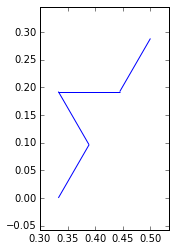

In [11]:
plot_segments(f(((0.3333333333333333, 0.0), (0.5, 0.28867513459481287))));

Finally, we make a function to apply f to every segment in a list.
We use some elegant notation called a “list comprehension“ here.

In [12]:
def recurse(segments):
    return [x for s in segments for x in f(s)]

In [13]:
recurse([(a,e)])

[((0.0, 0.0), (0.3333333333333333, 0.0)),
 ((0.3333333333333333, 0.0), (0.5, 0.28867513459481287)),
 ((0.5, 0.28867513459481287), (0.6666666666666666, 0.0)),
 ((0.6666666666666666, 0.0), (1.0, 0.0))]

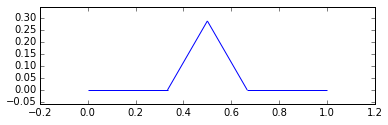

In [14]:
plot_segments(recurse([(a,e)]));

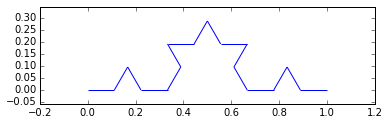

In [15]:
segements = [(a,e)]
for i in range(2):
    segements = recurse(segements)
plot_segments(segements);

Finally, we'll make the full snowflake by starting from an equilateral triangle.

In [16]:
def snowflake(n):
    p = -math.cos(math.pi/6), math.sin(math.pi/6)
    q = math.cos(math.pi/6), math.sin(5*math.pi/6)
    r = 0.0, -1.0
    segments = [(p,q), (q,r), (r,p)]
    for i in range(n):
        segments = recurse(segments)
    plot_segments(segments)

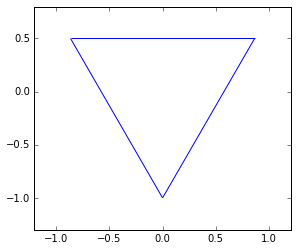

In [17]:
snowflake(0)

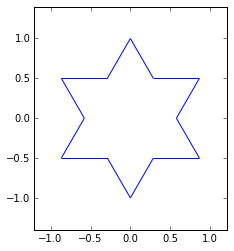

In [18]:
snowflake(1)

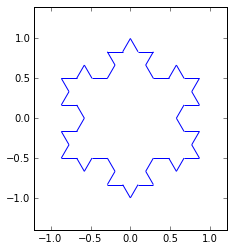

In [19]:
snowflake(2)

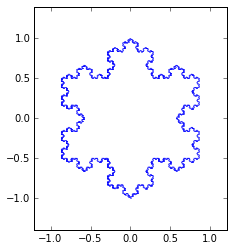

In [20]:
snowflake(6)

Note that the length of the line grow by 4/3 each iteration. 
The original triange has a perimeter of 3, so after $n$ iterations the curve has a length $3(4/3)^n$.
We can evaulate this for several values of n.

In [21]:
[(n, 3*(4/3)**n) for n in range(11)]

[(0, 3.0),
 (1, 4.0),
 (2, 5.333333333333333),
 (3, 7.111111111111109),
 (4, 9.48148148148148),
 (5, 12.641975308641971),
 (6, 16.855967078189295),
 (7, 22.47462277091906),
 (8, 29.96616369455874),
 (9, 39.95488492607832),
 (10, 53.273179901437764)]

Note that the true fractal curve, with $n\rightarrow\infty$), has an infinite length!